In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

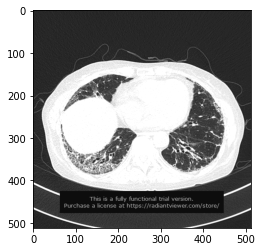

In [38]:
img=cv.imread("test/reticular/0100001.jpg")#转换成灰度图
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
#img=cv.equalizeHist(img)

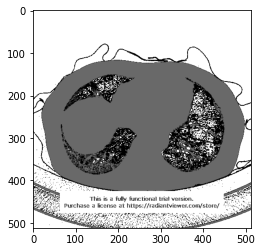

In [39]:
level=4 #灰度级
#变换灰度级
grayLevel=np.zeros(img.shape,np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        l=img[i,j]/(256/level)  #0,1,..,level-1级
        grayLevel[i,j]=l

        
plt.imshow(grayLevel*44-1,cmap="gray")

In [40]:
windowSize=(10,10)

GLCM=np.zeros((int(img.shape[0]/windowSize[0]),int(img.shape[0]/windowSize[1]),level,level),float) 

for i in range(GLCM.shape[0]):
    for j in range(GLCM.shape[1]):
        #将window提取出来
        tmpWindow=np.zeros(windowSize,np.uint8)
        tmpWindow=grayLevel[i*windowSize[0]:(i+1)*windowSize[0],j*windowSize[1]:(j+1)*windowSize[1]]
        #tmpGLCM=np.zeros((level,level),np.uint8)
        #计算window里的灰度共生矩阵
        for m in range(level):
            for n in range(level):
                num=0
                #计算tmpWindow中有多少个(m,n)对
                for a in range(windowSize[0]):
                    for b in range(windowSize[1]-1):
                        if tmpWindow[a,b]==m and tmpWindow[a,b+1]==n:
                            num+=1
                GLCM[i,j,m,n]=num

#归一化
for i in range(GLCM.shape[0]):
    for j in range(GLCM.shape[1]):
        GLCM[i,j]=GLCM[i,j].copy()/(GLCM[i,j].sum())
        

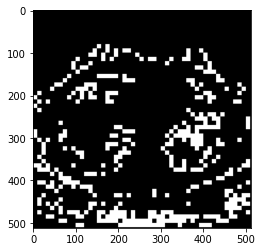

In [17]:
#对比度
con=np.zeros((int(img.shape[0]/windowSize[0]),int(img.shape[0]/windowSize[1])),float)
mask=con.copy()
for i in range(GLCM.shape[0]):
    for j in range(GLCM.shape[1]):
        tmpmatrix=GLCM[i,j].copy()
        for m in range(tmpmatrix.shape[0]):
            for n in range(tmpmatrix.shape[1]):
                con[i,j]+=((m-n)**2)*tmpmatrix[m,n]
        match=False
        matchnum=0
        for a in range(templateGLCM.shape[0]):
            for b in range(templateGLCM.shape[1]):
                if abs(con[i,j]-templatecon[a,b])<=0.05:
                    matchnum+=1
        
        if matchnum>=10:
            mask[i,j]=1

tmpResult=np.zeros(img.shape)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j]==1:
            tmpResult[i*windowSize[0]:(i+1)*windowSize[0],j*windowSize[1]:(j+1)*windowSize[1]]=255
        
        
plt.imshow(tmpResult,cmap="gray")

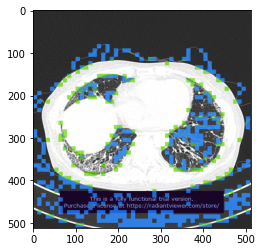

In [18]:
result=cv.imread("test/reticular/0100001.jpg")#转换成灰度图
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if tmpResult[i,j]==255:
            result[i,j]=result[i,j]*0.5+[20,100,200]
        
plt.imshow(result)


In [19]:
cv.imwrite("result.jpg",result)

True

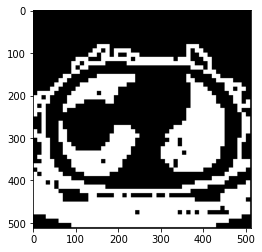

In [41]:
#熵
entropy=np.zeros((GLCM.shape[0],GLCM.shape[1]))
for i in range(GLCM.shape[0]):
    for j in range(GLCM.shape[1]):
        tmpGLCM=np.zeros((level,level),np.uint8)
        tmpGLCM=GLCM[i,j].copy()
        for k in range(level):
            for l in range(level):
                if tmpGLCM[k,l]==0:
                    entropy[i,j]-=0
                else:      
                    entropy[i,j]-=tmpGLCM[k,l]*np.log(tmpGLCM[k,l])
        
        #判断熵相同
        entropynum=0
        if abs(entropy[i,j]-templateEntropy.mean())<=0.01:
            mask[i,j]=1
 
tmpResult=np.zeros(img.shape)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j]==1:
            tmpResult[i*windowSize[0]:(i+1)*windowSize[0],j*windowSize[1]:(j+1)*windowSize[1]]=255
        
        
plt.imshow(tmpResult,cmap="gray")

In [37]:
#相关度


<ipython-input-37-6b7ada530912>:29: RuntimeWarning: invalid value encountered in true_divide
  correlation[i,j]+=((k*l*GLCM[i,j,k,l])-imean[i,j]*jmean[i,j])/((isigma[i,j]*jsigma[i,j])**0.5)
<ipython-input-37-6b7ada530912>:29: RuntimeWarning: divide by zero encountered in true_divide
  correlation[i,j]+=((k*l*GLCM[i,j,k,l])-imean[i,j]*jmean[i,j])/((isigma[i,j]*jsigma[i,j])**0.5)


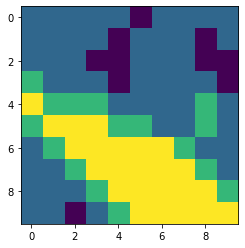

In [39]:
windowSize=(10,10)
tmpWindow=np.zeros(windowSize,np.uint8)
for k in range(windowSize[0]):
    for l in range(windowSize[1]):
        tmpWindow[k,l]=grayLevel[24*windowSize[0]+k,18*windowSize[1]+l]
        
        
plt.imshow(tmpWindow)

## 分析模板

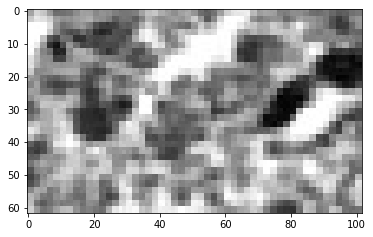

In [26]:
template=cv.imread("template/reticular.jpg")#转换成灰度图
template=cv.cvtColor(template,cv.COLOR_BGR2GRAY)
plt.imshow(template,cmap="gray")

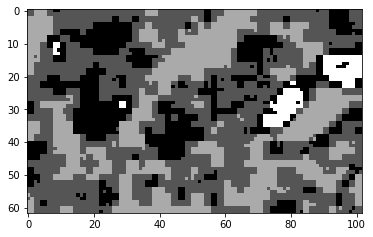

In [27]:
level=4 #灰度级
#变换灰度级
templateGrayLevel=np.zeros(template.shape,np.uint8)
for i in range(template.shape[0]):
    for j in range(template.shape[1]):
        l=template[i,j]/(256/level)  #0,1,..,level-1级
        templateGrayLevel[i,j]=l

        
plt.imshow(templateGrayLevel*64-1,cmap="gray")

In [28]:
windowSize=(10,10)

templateGLCM=np.zeros((int(templateGrayLevel.shape[0]/windowSize[0]),int(templateGrayLevel.shape[0]/windowSize[1]),level,level),float) 

for i in range(templateGLCM.shape[0]):
    for j in range(templateGLCM.shape[1]):
        #将window提取出来
        tmpWindow=np.zeros(windowSize,np.uint8)
        tmpWindow=templateGrayLevel[i*windowSize[0]:(i+1)*windowSize[0],j*windowSize[1]:(j+1)*windowSize[1]]
        #tmpGLCM=np.zeros((level,level),np.uint8)
        #计算window里的灰度共生矩阵
        for m in range(level):
            for n in range(level):
                num=0
                #计算tmpWindow中有多少个(m,n)对
                for a in range(windowSize[0]):
                    for b in range(windowSize[1]-1):
                        if tmpWindow[a,b]==m and tmpWindow[a,b+1]==n:
                            num+=1
                templateGLCM[i,j,m,n]=num

#归一化
for i in range(templateGLCM.shape[0]):
    for j in range(templateGLCM.shape[1]):
        templateGLCM[i,j]=templateGLCM[i,j].copy()/(templateGLCM[i,j].sum())
        

In [29]:
#熵
templateEntropy=np.zeros((templateGLCM.shape[0],templateGLCM.shape[1]))
for i in range(templateGLCM.shape[0]):
    for j in range(templateGLCM.shape[1]):
        tmpmatrix=templateGLCM[i,j].copy()
        for m in range(tmpmatrix.shape[0]):
            for n in range(tmpmatrix.shape[1]):
                if tmpmatrix[m,n]==0:
                    templateEntropy[i,j]-=0
                else:
                    templateEntropy[i,j]-=tmpmatrix[m,n]*np.log(tmpmatrix[m,n])

In [113]:
#asm
templateasm=np.zeros((templateGLCM.shape[0],templateGLCM.shape[1]),float)
for i in range(templateGLCM.shape[0]):
    for j in range(templateGLCM.shape[1]):
        templateasm[i,j]=np.sum(templateGLCM[i,j]**2)



In [6]:
#对比度
templatecon=np.zeros((templateGLCM.shape[0],templateGLCM.shape[1]),float)
for i in range(templateGLCM.shape[0]):
    for j in range(templateGLCM.shape[1]):
        tmpmatrix=templateGLCM[i,j].copy()
        for m in range(tmpmatrix.shape[0]):
            for n in range(tmpmatrix.shape[1]):
                templatecon[i,j]+=((m-n)**2)*tmpmatrix[m,n]
